# Customer Churn Prediction Model 

In [81]:
#Importing necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import *
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score

## Exploring Data

In [3]:
#Importing train dataset to explore
df = pd.read_csv('train.csv')

#Evaluate first 5 rows of data structure
df.head()

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,churn,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,state,area_code,phone
0,56.5,0.26,322.2,194.3,126,1,0,0,1,3,2,4,Male,False,True,MS,510,402-5509
1,84.0,0.46,279.1,170.9,92,0,0,0,1,2,2,3,Male,False,False,OH,510,370-3021
2,96.0,0.00,294.7,306,96,1,1,0,0,2,3,3,Female,True,False,MI,415,373-1448
3,62.0,0.00,255.4,185.6,100,2,0,0,0,2,2,3,Male,False,False,VT,510,403-1769
4,45.0,0.28,300.6,197.9,154,0,0,0,1,3,2,5,Male,False,True,WV,408,405-9384


In [4]:
# Checking for outliers
df.describe()

,last_purchase,max_discount,shoe_spend,acc_spend,custserv_calls,churn,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,area_code
count,2666.000000,2665.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,70.961553,0.081418,245.565304,102.430983,1.556264,0.149287,0.097524,0.277944,2.044261,2.159790,3.251688,437.737059
std,19.978791,0.136785,54.538190,27.921276,1.312955,0.356438,0.296726,0.448070,0.534996,0.495355,0.816830,42.679743
min,0.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,408.000000
25%,57.625000,0.000000,208.500000,85.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,415.000000
50%,71.500000,0.000000,245.350000,103.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,415.000000
75%,84.500000,0.200000,282.675000,121.000000,2.000000,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,510.000000
max,121.000000,0.500000,411.800000,200.000000,9.000000,1.000000,1.000000,1.000000,3.000000,3.000000,6.000000,510.000000


In [5]:
#Checking for NaN/Null values and anomalies
df.info()
df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   last_purchase    2666 non-null   float64
 1   max_discount     2665 non-null   float64
 2   shoe_spend       2666 non-null   float64
 3   apparell_spend   2666 non-null   object 
 4   acc_spend        2666 non-null   int64  
 5   custserv_calls   2666 non-null   int64  
 6   churn            2666 non-null   int64  
 7   acc_purchasers   2666 non-null   int64  
 8   promo_purchaser  2666 non-null   int64  
 9   shoe_orders      2666 non-null   int64  
 10  apparel_orders   2666 non-null   int64  
 11  acc_orders       2666 non-null   int64  
 12  gender           2666 non-null   object 
 13  ecommShopper     2666 non-null   bool   
 14  bhShopper        2666 non-null   bool   
 15  state            2666 non-null   object 
 16  area_code        2666 non-null   int64  
 17  phone         

last_purchase      False
max_discount        True
shoe_spend         False
apparell_spend     False
acc_spend          False
custserv_calls     False
churn              False
acc_purchasers     False
promo_purchaser    False
shoe_orders        False
apparel_orders     False
acc_orders         False
gender             False
ecommShopper       False
bhShopper          False
state              False
area_code          False
phone              False
dtype: bool

We find that there is a NaN value in the max_discount column. To take care of it, I found where the value was and decided the best way to fill it was using the mean of all max_discounts.

In [6]:
max_discount_missing = df['max_discount'].isna()
df.loc[max_discount_missing,:] 

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,churn,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,state,area_code,phone
267,96.0,NaN,116.8,200.2,104,2,0,0,0,1,2,3,Female,True,False,OR,510,394-3023


Alternatively, I could delete this row completely, however, I've decided not to because this is a relatively small dataset and we might lose valuable information relating to how the maximum discount for a customer could affect to the churn value I decided to fill it with the Mean value of all max_discounts becuase it's a numerical variable

In [7]:
updated_df = df
updated_df['max_discount']=updated_df['max_discount'].fillna(updated_df['max_discount'].mean())
updated_df.loc[[267]]

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,churn,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,state,area_code,phone
267,96.0,0.081418,116.8,200.2,104,2,0,0,0,1,2,3,Female,True,False,OR,510,394-3023


In [8]:
updated_df.describe()

,last_purchase,max_discount,shoe_spend,acc_spend,custserv_calls,churn,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,area_code
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,70.961553,0.081418,245.565304,102.430983,1.556264,0.149287,0.097524,0.277944,2.044261,2.159790,3.251688,437.737059
std,19.978791,0.136759,54.538190,27.921276,1.312955,0.356438,0.296726,0.448070,0.534996,0.495355,0.816830,42.679743
min,0.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,408.000000
25%,57.625000,0.000000,208.500000,85.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,415.000000
50%,71.500000,0.000000,245.350000,103.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,415.000000
75%,84.500000,0.200000,282.675000,121.000000,2.000000,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,510.000000
max,121.000000,0.500000,411.800000,200.000000,9.000000,1.000000,1.000000,1.000000,3.000000,3.000000,6.000000,510.000000


We see that even though we filled the NaN Value with the mean, the mean values of the column doesn't change nor do other properties of the column which is a good sign, in the sense that using that method to fill in the value hopefully does not affect the outcome of our modelling accuracy too much.

Another thing to consider is when we look at the dataset, we see that many of the rows contain strings. We now have to convert these strings into numbers, because machine learning models only know how to deal with numbers. For each row that contains a string, we need to see if the strings are unique

In [9]:
print(updated_df.gender.unique())
print(updated_df.ecommShopper.unique())
print(updated_df.bhShopper.unique())

['Male' 'Female']
[False  True]
[ True False]


In [10]:
#Changing the 'gender', 'ecommShopper', and 'bhShipper' fields to Numerical data
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in updated_df.columns[1:]:
    if updated_df[col].dtype == 'object' or updated_df[col].dtype == 'bool':
        if len(list(updated_df[col].unique())) <= 2:
            le.fit(updated_df[col])
            updated_df[col] = le.transform(updated_df[col])
            le_count += 1

In [11]:
updated_df

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,churn,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,state,area_code,phone
0,56.5,0.26,322.2,194.3,126,1,0,0,1,3,2,4,1,0,1,MS,510,402-5509
1,84.0,0.46,279.1,170.9,92,0,0,0,1,2,2,3,1,0,0,OH,510,370-3021
2,96.0,0.00,294.7,306,96,1,1,0,0,2,3,3,0,1,0,MI,415,373-1448
3,62.0,0.00,255.4,185.6,100,2,0,0,0,2,2,3,1,0,0,VT,510,403-1769
4,45.0,0.28,300.6,197.9,154,0,0,0,1,3,2,5,1,0,1,WV,408,405-9384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,83.0,0.29,276.1,193.5,97,2,0,0,1,2,2,3,1,1,1,ID,510,399-7029
2662,71.0,0.00,154.7,230.1,135,5,1,0,0,1,3,4,1,0,0,OK,408,345-1524
2663,82.0,0.00,221.9,92.2,113,3,0,0,0,2,2,4,1,0,1,MA,415,419-2767
2664,79.5,0.42,279.3,158.2,113,0,0,0,1,2,2,4,1,0,1,VT,415,403-5552


Where:

In the 'gender' column; Male = 0, and Female = 1,

In the 'ecommShopper' and 'bhShopper' column; Male = 0, and Female = 1.

For now, we will drop the state, area code and phone number columns, as these most likely do not have any effect on predicting churning

In [12]:
updated_df=updated_df.drop(labels='state',axis=1)
updated_df=updated_df.drop(labels='area_code',axis=1)
updated_df=updated_df.drop(labels='phone',axis=1)

We will then move churn col to the last column for clairity sake

In [13]:
churn = updated_df.churn
updated_df.drop('churn', inplace=True, axis=1)
updated_df['churn'] = churn

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,churn
0,56.5,0.26,322.2,194.3,126,1,0,1,3,2,4,1,0,1,0
1,84.0,0.46,279.1,170.9,92,0,0,1,2,2,3,1,0,0,0
2,96.0,0.00,294.7,306,96,1,0,0,2,3,3,0,1,0,1
3,62.0,0.00,255.4,185.6,100,2,0,0,2,2,3,1,0,0,0
4,45.0,0.28,300.6,197.9,154,0,0,1,3,2,5,1,0,1,0


We can then look at our dataset one more time to see if there are any formatting issues

In [69]:
updated_df.head()

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,churn
0,56.5,0.26,322.2,194.3,126,1,0,1,3,2,4,1,0,1,0
1,84.0,0.46,279.1,170.9,92,0,0,1,2,2,3,1,0,0,0
2,96.0,0.00,294.7,306,96,1,0,0,2,3,3,0,1,0,1
3,62.0,0.00,255.4,185.6,100,2,0,0,2,2,3,1,0,0,0
4,45.0,0.28,300.6,197.9,154,0,0,1,3,2,5,1,0,1,0


In [70]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   last_purchase    2666 non-null   float64
 1   max_discount     2666 non-null   float64
 2   shoe_spend       2666 non-null   float64
 3   apparell_spend   2666 non-null   object 
 4   acc_spend        2666 non-null   int64  
 5   custserv_calls   2666 non-null   int64  
 6   acc_purchasers   2666 non-null   int64  
 7   promo_purchaser  2666 non-null   int64  
 8   shoe_orders      2666 non-null   int64  
 9   apparel_orders   2666 non-null   int64  
 10  acc_orders       2666 non-null   int64  
 11  gender           2666 non-null   int32  
 12  ecommShopper     2666 non-null   int64  
 13  bhShopper        2666 non-null   int64  
 14  churn            2666 non-null   int64  
dtypes: float64(3), int32(1), int64(10), object(1)
memory usage: 302.1+ KB


From the info command we also notice that the 'apparel_spend' column data type reads 'object' even though we can clearly see it contatins float values. This is a sign something is wrong, and there might be an object value somewhere in the column. We have to find and address the issue.

In [14]:
apparell_spend=updated_df['apparell_spend']

#We convert the apparell_spend column into its own datframe so that we can examine it
apparell_spend = apparell_spend.to_frame()
data_columns = ['apparell_spend']
#I then force the conversion any object values to a NaN and print the rows containing NaNs
num_df = (apparell_spend.drop(data_columns, axis=1).join(df[data_columns].apply(pd.to_numeric, errors='coerce')))
num_df[num_df[data_columns].isnull().all(axis=1)]

,apparell_spend
707,NaN


Doing this, we now find that there is in fact an object in the column and it is in **row 707**. We can print it, and fill it appropriately

Same with the 'max_discount' missing value, I choose to fill the missing 'apparell_spend' value with the mean value of all apparell_spend because it's a numerical variable and the added value won't affect the mean or other properties of the column

In [15]:
newly_updated_df = updated_df
newly_updated_df.loc[[707]]

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,churn
707,66.0,0.0,314.8,a,116,0,0,0,3,2,4,0,0,1,1


In [16]:
#Force conversion of object values to a NaN
data_columns = ['last_purchase', 'max_discount', 'shoe_spend', 'apparell_spend', 'acc_spend', 'custserv_calls', 'acc_purchasers', 'promo_purchaser', 'shoe_orders', 'apparel_orders', 'acc_orders', 'gender', 'ecommShopper', 'bhShopper', 'churn']
num_df = (newly_updated_df.drop(data_columns, axis=1).join(newly_updated_df[data_columns].apply(pd.to_numeric, errors='coerce')))
num_df.loc[[707]]

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,churn
707,66.0,0.0,314.8,NaN,116,0,0,0,3,2,4,0,0,1,1


In [17]:
#Fill with mean
num_df['apparell_spend']=num_df['apparell_spend'].fillna(num_df['apparell_spend'].mean())
num_df.loc[[707]]

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,churn
707,66.0,0.0,314.8,171.388105,116,0,0,0,3,2,4,0,0,1,1


In [18]:
#Check info to confirm data type has changed to float
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   last_purchase    2666 non-null   float64
 1   max_discount     2666 non-null   float64
 2   shoe_spend       2666 non-null   float64
 3   apparell_spend   2666 non-null   float64
 4   acc_spend        2666 non-null   int64  
 5   custserv_calls   2666 non-null   int64  
 6   acc_purchasers   2666 non-null   int64  
 7   promo_purchaser  2666 non-null   int64  
 8   shoe_orders      2666 non-null   int64  
 9   apparel_orders   2666 non-null   int64  
 10  acc_orders       2666 non-null   int64  
 11  gender           2666 non-null   int32  
 12  ecommShopper     2666 non-null   int64  
 13  bhShopper        2666 non-null   int64  
 14  churn            2666 non-null   int64  
dtypes: float64(4), int32(1), int64(10)
memory usage: 302.1 KB


Now that the data is numeric, it's time to build the model.

## Model Building

In [19]:
#Divinding data into feature and target matrices (X,and Y)
X = num_df.drop(labels='churn',axis=1)
Y = num_df.churn

In [20]:
print(X.shape, Y.shape)

(2666, 14) (2666,)


In [21]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

## Determining Appropriate Modeling Technique

For this prediction, to decide which model to use, I will test the accuracy of a few different models (**I chose classification models because they are commonly used to predict target binary variables**) and chose the one which produces the highest accuracy measurement.

The models I decided to use are:
- Logistic Regression Model
- K-Nearest Neighbor Model
- Random Forest Model

I started with a Logistic Regression model to train the model because it is a good model to start with in general and it works well with making predictions for boolean values.

In [22]:
#Logistic Regression Model
model = LogisticRegression()
lr = model.fit(X_train, y_train)
print(lr)
prediction_test = model.predict(X_test)

LogisticRegression()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluating and explaining Logistic Regression Model Performance

In [23]:
#Using the metrics.accuracy_score I evaluate the model performance and print out our accuracy
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8575


In [24]:
#I also used a confusion matrix to produce a more detailed report relating to accuracy of the model.
#Confusion Matrix

matrix=confusion_matrix(y_test, prediction_test)
print(matrix)
confusion_list=[]
for i in matrix:
     for j in i:
        confusion_list.append(j)
#print(confusion_list)
True_Positives=confusion_list[3]
True_Negatives=confusion_list[0]
False_Positives=confusion_list[1]
False_Negatives=confusion_list[2]
print('Nos. of True Positives=',True_Positives)
print('Nos. of True Negatives=',True_Negatives)
print('Nos. of False Positives=',False_Positives)
print('Nos. of False Negatives=',False_Negatives)
precision=(True_Positives/(True_Positives+False_Positives))
print('Precision=',precision)
Recall=(True_Positives/(True_Positives+False_Negatives))
print('Recall=',Recall)
Accuracy=((True_Positives+True_Negatives)/(True_Positives+False_Negatives+True_Negatives+False_Positives))
print('Accuracy=',Accuracy)

[[668  22]
 [ 92  18]]
Nos. of True Positives= 18
Nos. of True Negatives= 668
Nos. of False Positives= 22
Nos. of False Negatives= 92
Precision= 0.45
Recall= 0.16363636363636364
Accuracy= 0.8575


This means that the Logistic Regression Model accurately predicts customer churn **85.75%** of the time. I consider this decent accuracy.

In [58]:
#K-nearest neighbor Model
#I chose to use 13 neighbors, as I tested the range between 0 and 17, and although the accuracy did not vary a lot, 
#13 neighbors gave me the highest accuracy score.
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

### Evaluating K-Nearest Neighbor Model Performance

In [59]:
# Predict the labels for the test set
knn_prediction_test = knn.predict(X_test)

In [60]:
# Compute accuracy
accuracy_score(y_test, knn_prediction_test)

0.88625

In [61]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, knn_prediction_test)
print(matrix)
confusion_list=[]
for i in matrix:
     for j in i:
        confusion_list.append(j)
#print(confusion_list)
True_Positives=confusion_list[3]
True_Negatives=confusion_list[0]
False_Positives=confusion_list[1]
False_Negatives=confusion_list[2]
print('Nos. of True Positives=',True_Positives)
print('Nos. of True Negatives=',True_Negatives)
print('Nos. of False Positives=',False_Positives)
print('Nos. of False Negatives=',False_Negatives)
precision=(True_Positives/(True_Positives+False_Positives))
print('Precision=',precision)
Recall=(True_Positives/(True_Positives+False_Negatives))
print('Recall=',Recall)
Accuracy=((True_Positives+True_Negatives)/(True_Positives+False_Negatives+True_Negatives+False_Positives))
print('Accuracy=',Accuracy)

[[672  18]
 [ 73  37]]
Nos. of True Positives= 37
Nos. of True Negatives= 672
Nos. of False Positives= 18
Nos. of False Negatives= 73
Precision= 0.6727272727272727
Recall= 0.33636363636363636
Accuracy= 0.88625


This means that the K-nearest neighbor Model using 13 neighbors, correctly accurately predicts customer churn **88.625%** of the time. Which is very decent

In [27]:
#RandomForestClassifier Model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

### Evaluating Random Forest Model Performance

In [28]:
# Predict the labels for the test set
clf_prediction_test = clf.predict(X_test)

In [29]:
# Compute accuracy  
accuracy_score(y_test, clf_prediction_test)

0.94

In [30]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, clf_prediction_test)
print(matrix)
confusion_list=[]
for i in matrix:
     for j in i:
        confusion_list.append(j)
#print(confusion_list)
True_Positives=confusion_list[3]
True_Negatives=confusion_list[0]
False_Positives=confusion_list[1]
False_Negatives=confusion_list[2]
print('Nos. of True Positives=',True_Positives)
print('Nos. of True Negatives=',True_Negatives)
print('Nos. of False Positives=',False_Positives)
print('Nos. of False Negatives=',False_Negatives)
precision=(True_Positives/(True_Positives+False_Positives))
print('Precision=',precision)
Recall=(True_Positives/(True_Positives+False_Negatives))
print('Recall=',Recall)
Accuracy=((True_Positives+True_Negatives)/(True_Positives+False_Negatives+True_Negatives+False_Positives))
print('Accuracy=',Accuracy)

[[679  11]
 [ 37  73]]
Nos. of True Positives= 73
Nos. of True Negatives= 679
Nos. of False Positives= 11
Nos. of False Negatives= 37
Precision= 0.8690476190476191
Recall= 0.6636363636363637
Accuracy= 0.94


This means that the Random Forest Classifier Model accurately predicted customer churn in the 'train.csv' file **94%** of the time. This produced the best accuracy.

I have decided that this is the model I will use, since it is the most accurate

## Writing Model into 'test.csv' File

In [31]:
#Using the decided model to predict churn in the train csv and writing into the 'test.csv' file
test_df = pd.read_csv('test.csv')

test_df.head()

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,state,area_code,phone
0,57.5,0.25,330.1,167.4,100,1,0,1,3,2,3,Male,True,True,KS,415,382-4657
1,84.0,0.00,231.7,118.3,101,3,1,0,2,2,3,Male,False,True,OK,415,330-6626
2,89.0,0.00,194.1,198.5,127,4,0,0,2,2,4,Male,False,True,IN,415,329-6603
3,56.5,0.00,248.0,42.9,95,0,0,0,2,1,3,Male,False,True,AZ,415,358-1958
4,66.0,0.00,175.4,107.3,77,2,0,0,1,2,3,Female,False,True,SC,415,350-2565


In [32]:
test_df.info()
test_df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   last_purchase    667 non-null    float64
 1   max_discount     667 non-null    float64
 2   shoe_spend       667 non-null    float64
 3   apparell_spend   667 non-null    float64
 4   acc_spend        667 non-null    int64  
 5   custserv_calls   667 non-null    int64  
 6   acc_purchasers   667 non-null    int64  
 7   promo_purchaser  667 non-null    int64  
 8   shoe_orders      667 non-null    int64  
 9   apparel_orders   667 non-null    int64  
 10  acc_orders       667 non-null    int64  
 11  gender           667 non-null    object 
 12  ecommShopper     667 non-null    bool   
 13  bhShopper        667 non-null    bool   
 14  state            667 non-null    object 
 15  area_code        667 non-null    int64  
 16  phone            667 non-null    object 
dtypes: bool(2), floa

last_purchase      False
max_discount       False
shoe_spend         False
apparell_spend     False
acc_spend          False
custserv_calls     False
acc_purchasers     False
promo_purchaser    False
shoe_orders        False
apparel_orders     False
acc_orders         False
gender             False
ecommShopper       False
bhShopper          False
state              False
area_code          False
phone              False
dtype: bool

In [33]:
test_df=test_df.drop(labels='state',axis=1)
test_df=test_df.drop(labels='area_code',axis=1)
test_df=test_df.drop(labels='phone',axis=1)

In [34]:
print(test_df.gender.unique())
print(test_df.ecommShopper.unique())
print(test_df.bhShopper.unique())

['Male' 'Female']
[ True False]
[ True False]


In [35]:
le = LabelEncoder()
#Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in test_df.columns[1:]:
    if test_df[col].dtype == 'object' or test_df[col].dtype == 'bool':
        if len(list(test_df[col].unique())) <= 2:
            le.fit(test_df[col])
            test_df[col] = le.transform(test_df[col])
            le_count += 1

In [36]:
test_df

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper
0,57.5,0.25,330.1,167.4,100,1,0,1,3,2,3,1,1,1
1,84.0,0.00,231.7,118.3,101,3,1,0,2,2,3,1,0,1
2,89.0,0.00,194.1,198.5,127,4,0,0,2,2,4,1,0,1
3,56.5,0.00,248.0,42.9,95,0,0,0,2,1,3,1,0,1
4,66.0,0.00,175.4,107.3,77,2,0,0,1,2,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,74.5,0.00,255.4,62.0,136,2,0,0,2,1,4,1,0,0
663,31.0,0.00,294.9,114.4,142,2,0,0,2,2,4,1,1,1
664,77.0,0.00,243.7,203.7,91,1,0,0,2,2,3,1,0,1
665,77.0,0.00,180.4,179.9,159,3,0,0,1,2,5,1,1,0


In [37]:
#Using clf model on new dataset
churn_prediction=clf.predict(test_df)

In [38]:
#print(len(churn_prediction))
test_df['Predicted_Churn Value']=churn_prediction

In [40]:
#Predicting the churn value (0 or 1) of the observations in `test.csv`
test_df

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,Predicted_Churn Value
0,57.5,0.25,330.1,167.4,100,1,0,1,3,2,3,1,1,1,0
1,84.0,0.00,231.7,118.3,101,3,1,0,2,2,3,1,0,1,0
2,89.0,0.00,194.1,198.5,127,4,0,0,2,2,4,1,0,1,1
3,56.5,0.00,248.0,42.9,95,0,0,0,2,1,3,1,0,1,0
4,66.0,0.00,175.4,107.3,77,2,0,0,1,2,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,74.5,0.00,255.4,62.0,136,2,0,0,2,1,4,1,0,0,0
663,31.0,0.00,294.9,114.4,142,2,0,0,2,2,4,1,1,1,0
664,77.0,0.00,243.7,203.7,91,1,0,0,2,2,3,1,0,1,0
665,77.0,0.00,180.4,179.9,159,3,0,0,1,2,5,1,1,0,0


In [76]:
#Adding 'Predicted_Churn Value' column to the end of file
final_df = pd.read_csv('test.csv')

final_df['Predicted_Churn Value']=churn_prediction

final_df.head()

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,state,area_code,phone,Predicted_Churn Value
0,57.5,0.25,330.1,167.4,100,1,0,1,3,2,3,Male,True,True,KS,415,382-4657,0
1,84.0,0.00,231.7,118.3,101,3,1,0,2,2,3,Male,False,True,OK,415,330-6626,0
2,89.0,0.00,194.1,198.5,127,4,0,0,2,2,4,Male,False,True,IN,415,329-6603,1
3,56.5,0.00,248.0,42.9,95,0,0,0,2,1,3,Male,False,True,AZ,415,358-1958,0
4,66.0,0.00,175.4,107.3,77,2,0,0,1,2,3,Female,False,True,SC,415,350-2565,0


In [79]:
#Export dataframe to csv named 'test_with_predicted_churn_value.csv'
final_df.to_csv('test_with_predicted_churn_value.csv',index=False)

## Supplementary Exploratory Data Analysis

These last steps were additional and optional, however, beacuse the clf library has feature importance command, I chose to visualize how each feature field affects customer churn on the train dataset, and find out which one has the most impact.

Text(0.5, 1.0, 'Feature Impact on Churn Prediction')

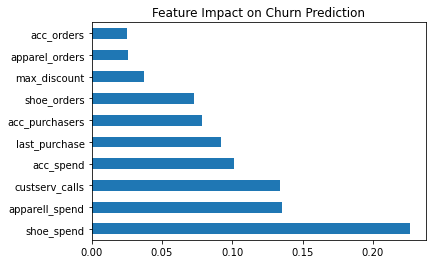

In [80]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Impact on Churn Prediction')

Based on this data, we can see that shoe_spend has the highest impact on customer churn and significantly more so than any other variables

An additional data exploration feature I added was the percentage of customers that "churned" the branded in six months and finding out whether churners wer more likely to make customer service calls that non-churners.

In [28]:
#Count of customers who abandoned the brand
y.value_counts()

churn
0        2268
1         398
dtype: int64

In [75]:
percentage_churners=(398/2268)*100
print("Six-month churn rate of Underarmour given train dataset is %.2f percent"%(percentage_churners))

Six-month churn rate of Underarmour given train dataset is 17.55 percent


In [29]:
#Grouping data by churn to compute the mean to find out if churners make more customer service calls than non-churners
print(df.groupby('churn')['custserv_calls'].mean())

churn
0    1.447531
1    2.175879
Name: custserv_calls, dtype: float64


From the data we see, unsurprisingly, churners make more customer service calls than non-churners.